In [47]:
import torch
import numpy as np

import pandas as pd
import seaborn as sns

from sklearn.metrics import roc_curve, auc, RocCurveDisplay 


In [3]:
sca = torch.load("/home/jbv415/UncertainDepths/src/models/outputs/roc_curves/2024_01_24_22_02_34_7122_Online_Laplace/scaled_uncertainty_all_pixels.pt",map_location=torch.device("cpu"))
unc = torch.load("/home/jbv415/UncertainDepths/src/models/outputs/roc_curves/2024_01_24_22_02_34_7122_Online_Laplace/_uncertainty_all_pixels.pt",map_location=torch.device("cpu"))
OOD = torch.load("/home/jbv415/UncertainDepths/src/models/outputs/roc_curves/2024_01_24_22_02_34_7122_Online_Laplace/OOD_class_all_pixels.pt",map_location=torch.device("cpu"))

print(sca.shape, unc.shape, OOD.shape)

torch.Size([204, 1, 352, 1216]) torch.Size([204, 1, 352, 1216]) torch.Size([204, 1, 352, 1216])


In [37]:
data = pd.DataFrame(data={"Scaled Uncertainty": sca.numpy(force=True).astype(np.float16).flatten(), "Uncertainty": unc.numpy(force=True).astype(np.float16).flatten(), "OOD class?" : OOD.numpy(force=True).flatten().astype(bool)})



In [38]:
len(data)

87318528

In [39]:
random_data = data.loc[np.random.choice(len(data), size = 100000),:]

<Axes: xlabel='Scaled Uncertainty', ylabel='Probability'>

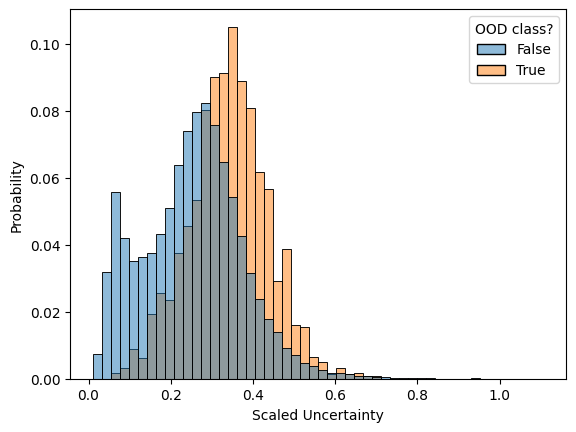

In [42]:

sns.histplot(data=random_data,x = "Scaled Uncertainty", hue="OOD class?", bins=50, stat="probability", common_norm=False)
#sns.histplot(data=random_data,x = "Uncertainty", hue="OOD class?", bins=50, stat="probability", common_norm=False)


In [48]:
scaled_roc_curve_fpr, scaled_roc_curve_tpr, _ = roc_curve(
        y_true=random_data["OOD class?"], y_score=random_data["Scaled Uncertainty"]
    )

roc_auc = auc(scaled_roc_curve_fpr, scaled_roc_curve_tpr)
display = RocCurveDisplay(fpr=scaled_roc_curve_fpr, tpr=scaled_roc_curve_tpr,roc_auc=roc_auc)

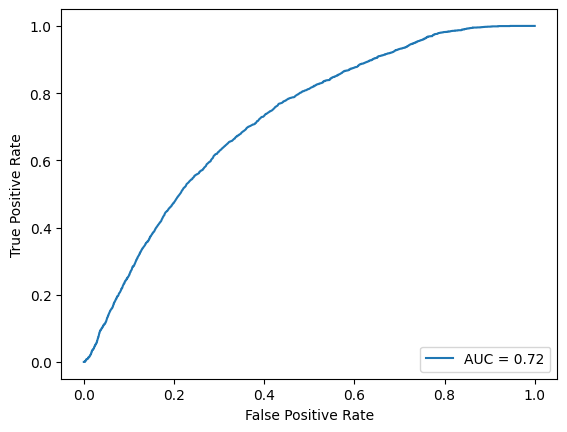

In [50]:
display.plot()